## Fis distribution by population

I calculated Fis using the ``hierfstat`` package in R, and then plotted the distributions of Fis by population. These plots exclude NA values which made up a tiny bit over half of the data, and I'm not entirely sure what produces an NA value still. So take this with a grain of salt!

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder

/mnt/hgfs/SHARED_FOLDER/WorkingFolder


In [24]:
fis_file = open("fis_snpgenepop_20170317.csv", "r") # read in file

lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines

header_pops = headerline.strip().split(",")
header_pops = header_pops[1:]

print header_pops # check working

['WA_Strait', 'WA_SanJuans', 'WA_Dabob', 'AK', 'CA_Catalina']


In [31]:
fis_sets = []
NA_count = 0
total_count = 0

for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split(",")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 238896
NAs made up 58.07% of your Fis estimates.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

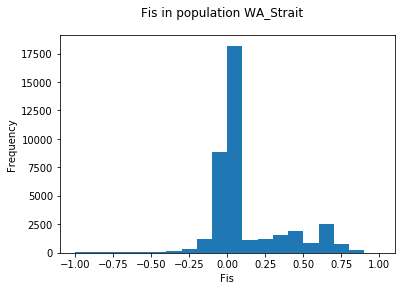

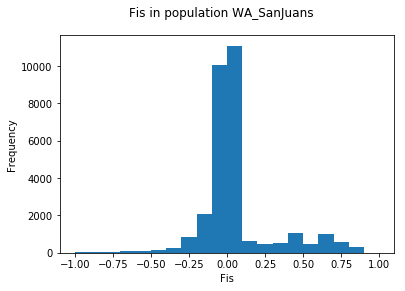

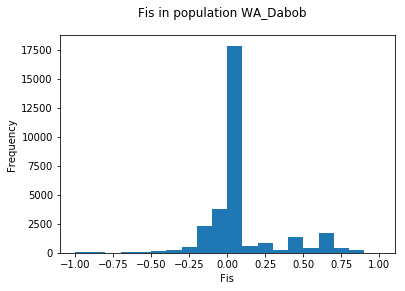

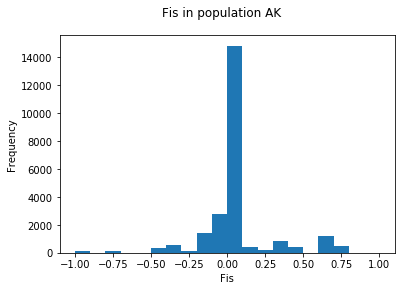

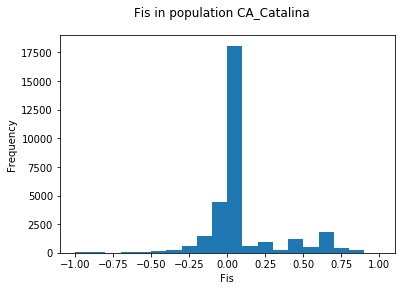

In [29]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1))
    plt.suptitle("Fis in population " + header_pops[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()